### Your Turn!

In the last video, you saw two of the main aspects of principal components:

1. **The amount of variability captured by the component.**
2. **The components themselves.**

In this notebook, you will get a chance to explore these a bit more yourself.  First, let's read in the necessary libraries, as well as the data.

D:\udacity\intro-ml\notebooks\pca\helper_functions.py:43: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(num_images/10,10,digit_num+1) #create subplots


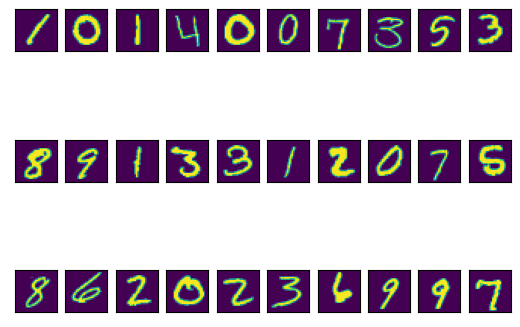

In [10]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from helper_functions import show_images, do_pca, scree_plot, plot_component
import test_code as t

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#read in our dataset
train = pd.read_csv('./data/train.csv')
train.fillna(0, inplace=True)

# save the labels to a Pandas series target
y = train['label']
# Drop the label feature
X = train.drop("label",axis=1)

show_images(30)

`1.` Perform PCA on the **X** matrix using on your own or using the **do_pca** function from the **helper_functions** module. Reduce the original more than 700 features to only 10 principal components.

In [9]:
# Make sure to keep track of the resulting components and the pca object
do_pca?

Signature: do_pca(n_components, data)
Docstring:
Transforms data using PCA to create n_components, and provides back the results of the
transformation.

INPUT: n_components - int - the number of principal components to create
       data - the data you would like to transform

OUTPUT: pca - the pca object created after fitting the data
        X_pca - the transformed X matrix with new number of components
File:      d:\udacity\intro-ml\notebooks\pca\helper_functions.py
Type:      function


In [25]:
from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display

In [20]:
pca[1]

PCA(n_components=10)

In [ ]:
def f(x):
    return x

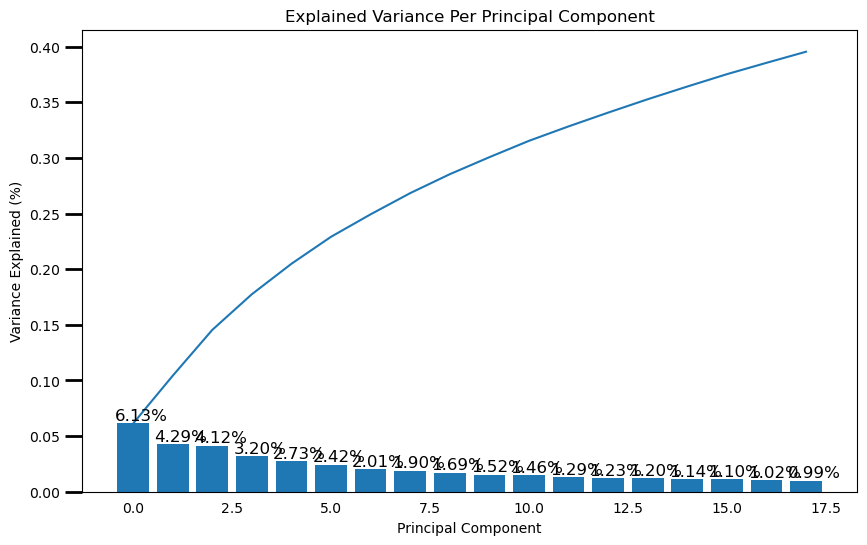

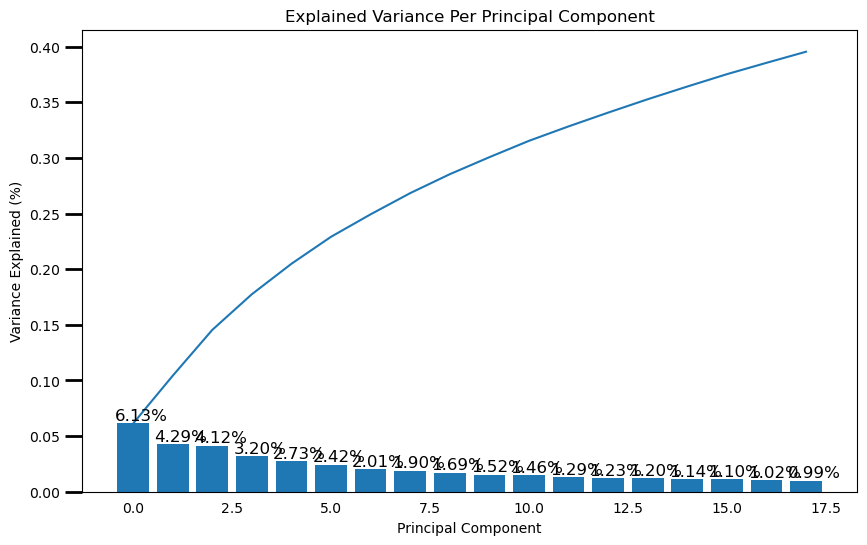

In [38]:
n_components = 10
def make_pca(data, n):
    pipe = Pipeline(
        [('scaler', StandardScaler()), 
         ( f'pca_{n_components}', PCA(n))]
    )

    X_pca = pipe.fit_transform(data)
    pca = pipe[1]
    ind = np.arange(n)
    vals = pca.explained_variance_ratio_
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(n):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
    display(plt.gcf())
    return (pca)
    
pca = make_pca(X, 18);

`2.` Now use the **scree_plot** function from the **helper_functions** module to take a closer look at the results of your analysis.

In [7]:
scree_plot?
#Use the scree plot to answer the next question

Signature: scree_plot(pca)
Docstring:
Creates a scree plot associated with the principal components 

INPUT: pca - the result of instantian of PCA in scikit learn
        
OUTPUT:
        None
File:      d:\udacity\intro-ml\notebooks\pca\helper_functions.py
Type:      function


`3.` Using the results of your scree plot, match each letter as the value to the correct key in the **solution_three** dictionary.  Once you are confident in your solution run the next cell to see if your solution matches ours.

In [32]:
a = True
b = False
c = 6.13
d = 'The total amount of variability in the data explained by the first two principal components'
e = None

solution_three = {
    '10.42' : d, #letter, 
    'The first component will ALWAYS have the most amount of variability explained.': a, #letter,
    'The total amount of variability in the data explained by the first component': c,  #letter,
    'The sum of the variability explained by all the components can be greater than 100%': b, #letter
}

In [33]:
#Run this cell to see if your solution matches ours
t.question_3_check(solution_three)

Looks good!  The amount of variability explained by each principal component gives us an idea of how much of the original variability in the original data is retained by each component.  Nice job matching these up!


`4.` Use the **plot_component** function from the **helper_functions** module to look at each of the components (remember they are 0 indexed).  Use the results to assist with question 5.

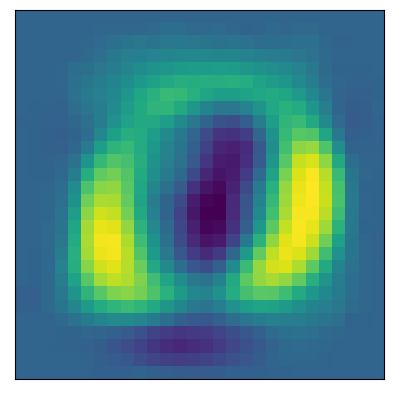

In [50]:
# Use the images of the component weights to answer the next question
plot_component(pca, 0)

`5.` Using the results from viewing each of your principal component weights in question 4, change the following values of the **solution_five** dictionary to the **number of the index** for the principal component that best matches the description.  Once you are confident in your solution run the next cell to see if your solution matches ours.

In [51]:
solution_five = {
    'This component looks like it will assist in identifying zero': 0,#number 0-9,
    'This component looks like it will assist in identifying three': 3, #number 0-9
}

In [52]:
#Run this cell to see if your solution matches ours
t.question_5_check(solution_five)

Nice job!  That matches our solution as well!  The index of the first principal component appears to have really high weights where a zero would appear.  Alternatively, the fourth (third indexed component) appears to downweight where a three would appear to make it stand out.


From this notebook, you have had an opportunity to look at the two major parts of PCA:

`I.` The amount of **variance explained by each component**.  This is called an **eigenvalue**.

`II.` The principal components themselves, each component is a vector of weights.  In this case, the principal components help us understand which pixels of the image are most helpful in identifying the difference between digits. **Principal components** are also known as **eigenvectors**.